In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datos


In [2]:
# esta celda sirve para dar permiso al accedo de tus archivos del gdrive
link ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTRmmsm3qKHPv04W2q5Vp57bVLa6tc706boLNhS7mVtH1hh4gpkAfRT7d1XsQYd1g/pub?gid=145097224&single=true&output=csv'

In [3]:
# MS : indica frecuencia mensual

df = pd.read_csv(link)
df.head()

,timestamp,demand
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [4]:

df = df.set_index('timestamp')
df.head()

,demand
timestamp,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<Figure size 1152x504 with 0 Axes>

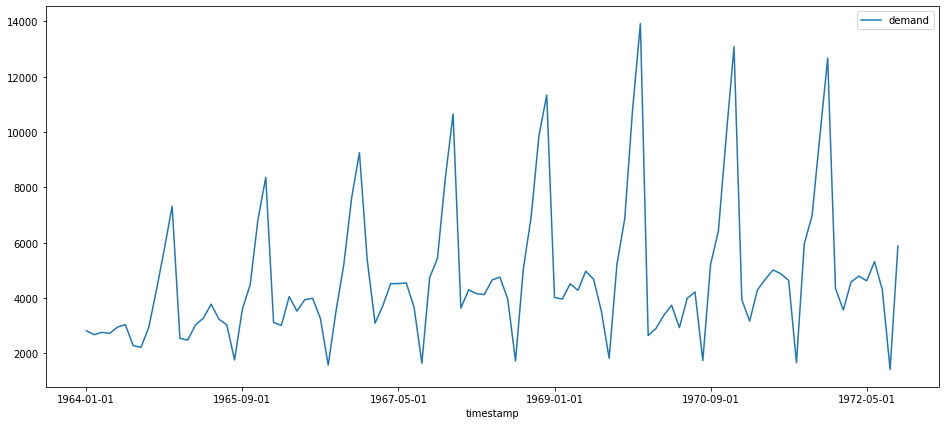

In [7]:
# iloc[filas,columnas]
df.plot(figsize = (16,7))

## Train Test Split

In [13]:
df.shape

(105, 1)

In [14]:
len(df)

105

In [15]:
# longitud data de entrenamiento
test_size = 12
len(df) - test_size

93

In [16]:
train = df.iloc[:len(df)-test_size]
test = df.iloc[len(df)- test_size:]

In [17]:
len(test)

12

## Escalando los datos

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
# escalamos la data de entrenamiento
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

Este generador toma una secuencia de puntos de datos y crea un dataframe osea convierte,la serie (vector columna) a matriz (regresores y target)

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
scaled_train

array([[0.10062384],
       [0.08903832],
       [0.09576278],
       [0.09300818],
       [0.11123714],
       [0.11852872],
       [0.05744146],
       [0.05177023],
       [0.10929272],
       [0.22101596],
       [0.33954468],
       [0.4649599 ],
       [0.07842502],
       [0.07307786],
       [0.11812363],
       [0.13716276],
       [0.17848173],
       [0.13424613],
       [0.11788058],
       [0.01506927],
       [0.16381755],
       [0.235032  ],
       [0.42655756],
       [0.54962327],
       [0.12476707],
       [0.11609819],
       [0.20043749],
       [0.15798428],
       [0.19152556],
       [0.19549542],
       [0.13667666],
       [0.        ],
       [0.15838937],
       [0.29474196],
       [0.48942721],
       [0.62229604],
       [0.30802884],
       [0.12274163],
       [0.17378271],
       [0.23827271],
       [0.23875881],
       [0.24029814],
       [0.16932674],
       [0.00567123],
       [0.25650166],
       [0.31232277],
       [0.54613951],
       [0.735

In [24]:
# Definimos el generator
n_input = 2  # es como si tuviera una matriz con 2 predictores
n_features = 1  # porque es una serie univariante
# se repite scaled_train porque el input es igual al output
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [25]:
len(scaled_train)

93

In [26]:
len(generator) # n_input = 2

91

In [27]:
scaled_train[:5]

array([[0.10062384],
       [0.08903832],
       [0.09576278],
       [0.09300818],
       [0.11123714]])

In [28]:
# ¿Cómo luce el primer batch?
generator[0]

(array([[[0.10062384],
         [0.08903832]]]), array([[0.09576278]]))

In [29]:
# X son los inputs , y el tercer punto (predicción en función de los 2 primeros datos)

X,y = generator[0]

In [30]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.10062384 0.08903832]
Predicción: 
 [[0.09576278]]


Cambio los valores de n_input

In [31]:
# Vamos a redefinir para que utilice 12 meses y luego prediga el próximo mes
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [32]:
# ¿Cómo luce el primer batch?
X,y = generator[0]

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.10062384 0.08903832 0.09576278 0.09300818 0.11123714 0.11852872
 0.05744146 0.05177023 0.10929272 0.22101596 0.33954468 0.4649599 ]
Predict this y: 
 [[0.07842502]]


### Creando el Modelo

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit_generator(generator,epochs = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
81/81 [==============================] - 2s 6ms/step - loss: 0.0473
Epoch 2/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0446
Epoch 3/100
81/81 [==============================] - 0s 6ms/step - loss: 0.0429
Epoch 4/100
81/81 [==============================] - 0s 6ms/step - loss: 0.0406
Epoch 5/100
81/81 [==============================] - 0s 6ms/step - loss: 0.0399
Epoch 6/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0364
Epoch 7/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0309
Epoch 8/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0306
Epoch 9/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0281
Epoch 10/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0220
Epoch 11/100
81/81 [==============================] - 0s 6ms/step - loss: 0.0389
Epoch 12/100
81/81 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 13/100
81/81 [=================

In [38]:
model.history.history.keys()

dict_keys(['loss'])

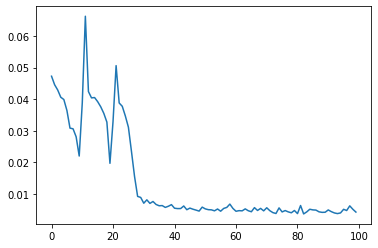

In [39]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluando en los Datos de Prueba (Test)

In [40]:
# 12 meses de historia ---> predecir el 13 (osea el primer valor del conjunto de test)
# Necesitaremos los últimos 12 meses del conjunto de entrenamiento para predecir el 1er mes en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [41]:
# 12 últimos valores de la data de entrenamiento
first_eval_batch

array([[0.39301628],
       [0.66993438],
       [0.93194523],
       [0.19128251],
       [0.12873694],
       [0.2198007 ],
       [0.25139755],
       [0.27845743],
       [0.26743903],
       [0.2479138 ],
       [0.00696751],
       [0.35469497]])

In [42]:
# la forma original de first_eval_batch 
# observamos que las dimensiones no son tipo tensor 3d
first_eval_batch.shape

(12, 1)

In [43]:
X.shape  # dimensiones deseadas

(1, 12, 1)

In [44]:
# redimensionamiento (asegurando las dimensiones tipo tensor 3D)

first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [45]:
# verificamos el nuevo dimensionamiento
first_eval_batch.shape

(1, 12, 1)

In [46]:
# devuelve el mes 13 (coincide con el primer dato de test)

model.predict(first_eval_batch)

array([[0.49781933]], dtype=float32)

In [47]:
scaled_test

array([[ 0.43814308],
       [ 0.67066353],
       [ 0.89905209],
       [ 0.22482379],
       [ 0.161306  ],
       [ 0.24337681],
       [ 0.26047152],
       [ 0.24669853],
       [ 0.30292473],
       [ 0.22077291],
       [-0.01296281],
       [ 0.34869967]])

Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba.
----

In [48]:
# en lugar de len(test) podemos colocar la cantidad de meses a futuro que se quiere predecir

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(2*len(test)):   ## para cambiar el número de puntos a futuro que se desea predecir , cambiar el número que esta entre parentesis() 
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
# y_pred
test_predictions

[array([0.49781933], dtype=float32),
 array([0.7891104], dtype=float32),
 array([1.1468631], dtype=float32),
 array([0.19454306], dtype=float32),
 array([0.1022965], dtype=float32),
 array([0.1665885], dtype=float32),
 array([0.20228198], dtype=float32),
 array([0.2417492], dtype=float32),
 array([0.2609775], dtype=float32),
 array([0.26476708], dtype=float32),
 array([0.10473566], dtype=float32),
 array([0.39578658], dtype=float32),
 array([0.56826735], dtype=float32),
 array([0.91532576], dtype=float32),
 array([1.420302], dtype=float32),
 array([0.18009493], dtype=float32),
 array([0.05496899], dtype=float32),
 array([0.09102408], dtype=float32),
 array([0.11894082], dtype=float32),
 array([0.15897554], dtype=float32),
 array([0.1969985], dtype=float32),
 array([0.23234713], dtype=float32),
 array([0.14712851], dtype=float32),
 array([0.37997746], dtype=float32)]

In [50]:
# y_test
scaled_test

array([[ 0.43814308],
       [ 0.67066353],
       [ 0.89905209],
       [ 0.22482379],
       [ 0.161306  ],
       [ 0.24337681],
       [ 0.26047152],
       [ 0.24669853],
       [ 0.30292473],
       [ 0.22077291],
       [-0.01296281],
       [ 0.34869967]])

## Transformación inversa y Comparación

In [51]:
true_predictions = scaler.inverse_transform(test_predictions)

In [52]:
# y_pred original
true_predictions

array([[ 7717.58404288],
       [11312.9899404 ],
       [15728.73127925],
       [ 3974.24503452],
       [ 2835.64571676],
       [ 3629.20185725],
       [ 4069.7665002 ],
       [ 4556.91034159],
       [ 4794.24536443],
       [ 4841.02007517],
       [ 2865.75222142],
       [ 6458.1937992 ],
       [ 8587.12384462],
       [12870.86586607],
       [19103.78799856],
       [ 3795.91169074],
       [ 2251.48229431],
       [ 2696.51020005],
       [ 3041.08648361],
       [ 3535.23510987],
       [ 4004.55256924],
       [ 4440.86063516],
       [ 3389.00716801],
       [ 6263.06184649]])

In [53]:
# y_test original
test = test.reset_index()

Concatenar axis = 1 pone tablas una al lado de otra

In [54]:
# guardamos y_pred en el df test
test2 = pd.concat([test,pd.DataFrame(true_predictions)],axis =1)

In [55]:
test2

,timestamp,demand,0
0,1971-10-01,6981.0,7717.584043
1,1971-11-01,9851.0,11312.989940
2,1971-12-01,12670.0,15728.731279
3,1972-01-01,4348.0,3974.245035
4,1972-02-01,3564.0,2835.645717
5,1972-03-01,4577.0,3629.201857
6,1972-04-01,4788.0,4069.766500
7,1972-05-01,4618.0,4556.910342
8,1972-06-01,5312.0,4794.245364
9,1972-07-01,4298.0,4841.020075


Concat axis = 0, pone tablas una debajo de otra

In [56]:
# concatenamos df con test

df_total = pd.concat([df,test2],axis =0)

In [57]:
# tenia originalmente 72 + 24 pred = 96

x = np.arange(0,len(df_total),1).reshape(-1,1)
len(x)

129

In [58]:
len(df_total.iloc[:,-1].values)

129

In [59]:
df_total.columns

Index(['demand', 'timestamp', 0], dtype='object')

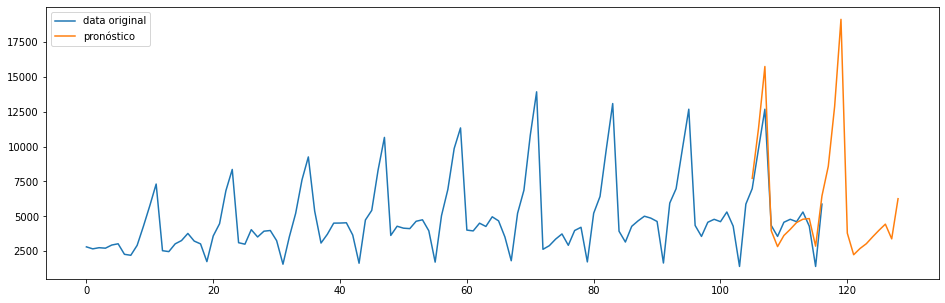

In [60]:
# comparando y_pred, vs y_test
plt.figure(figsize =(16,5))

plt.plot(x,df_total.iloc[:,0].values,label ='data original')
plt.plot(x,df_total.iloc[:,-1].values, label ='pronóstico')
plt.legend(loc = 'best')

# Guardar un Modelo

In [61]:
model.save('my_rnn_model.h5')

# Cargar un Modelo

In [62]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [63]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
